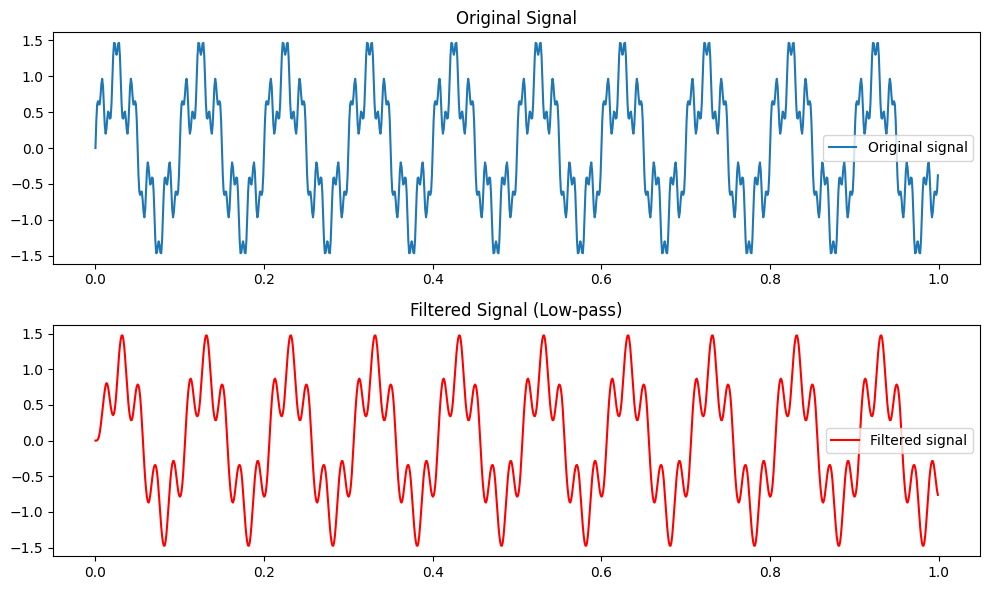

In [1]:
from scipy.signal import butter, sosfilt

def butter_filter(data, cutoff, fs, order=5, filter_type='low', output='sos'):
    """
    Applies a Butterworth filter to the given data.

    Args:
        data (array-like): The input data to be filtered.
        cutoff (float or array-like): The cutoff frequency(ies).
                                      If filter_type is 'low' or 'high', cutoff is a scalar.
                                      If filter_type is 'bandpass' or 'bandstop', cutoff is a
                                      1-D sequence of length 2, giving the lower and upper
                                      cutoff frequencies.
        fs (float): The sampling frequency of the data.
        order (int, optional): The order of the filter. Higher order results in a sharper cutoff.
                               Defaults to 5.
        filter_type (str, optional): The type of filter to apply.
                                     Options are 'low', 'high', 'bandpass', 'bandstop'.
                                     Defaults to 'low'.
        output (str, optional): Filter output type, 'sos' (second-order sections) or 'ba'
                                (numerator/denominator). 'sos' is recommended for stability.
                                Defaults to 'sos'.

    Returns:
        array-like: The filtered data.
    """

    sos = butter(order, cutoff, btype=filter_type, fs=fs, output=output)
    filtered_data = sosfilt(sos, data)
    return filtered_data

if __name__ == '__main__':
    import numpy as np
    import matplotlib.pyplot as plt

    # Generate sample data
    fs = 1000  # Sampling frequency (Hz)
    t = np.arange(0, 1, 1/fs)  # Time vector
    freq1, freq2 = 10, 50 # Signal frequencies
    noise_freq = 150 # Noise frequency
    signal = np.sin(2*np.pi*freq1*t) + 0.5*np.sin(2*np.pi*freq2*t) + 0.2*np.sin(2*np.pi*noise_freq*t) # Signal with noise

    # Apply a low-pass Butterworth filter
    cutoff_freq = 70  # Cutoff frequency
    filtered_signal = butter_filter(signal, cutoff_freq, fs, order=4, filter_type='low')

    # Plotting
    plt.figure(figsize=(10, 6))

    plt.subplot(2, 1, 1)
    plt.plot(t, signal, label='Original signal')
    plt.title('Original Signal')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(t, filtered_signal, label='Filtered signal', color='red')
    plt.title('Filtered Signal (Low-pass)')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [4]:
!pip install PyWavelets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 46.4 MB/s eta 0:00:00


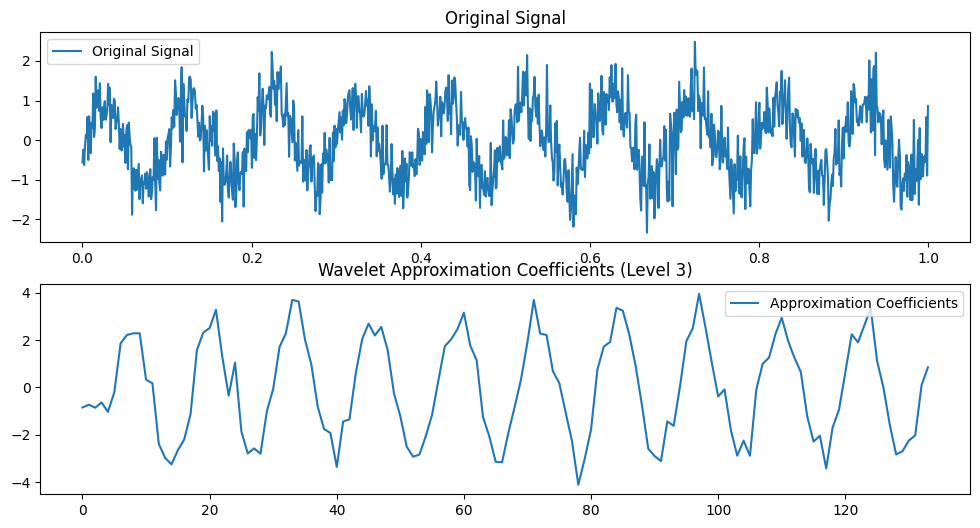

In [5]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

# Generate a sample signal (sinusoidal with noise)
t = np.linspace(0, 1, num=1024)
signal = np.sin(20 * np.pi * t) + 0.5 * np.random.randn(1024)

# Apply Discrete Wavelet Transform (DWT)
coeffs = pywt.wavedec(signal, 'db4', level=3)

# Plot original signal
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(t, signal, label="Original Signal")
plt.title("Original Signal")
plt.legend()

# Plot wavelet coefficients
plt.subplot(2,1,2)
plt.plot(coeffs[0], label="Approximation Coefficients")
plt.title("Wavelet Approximation Coefficients (Level 3)")
plt.legend()

plt.show()


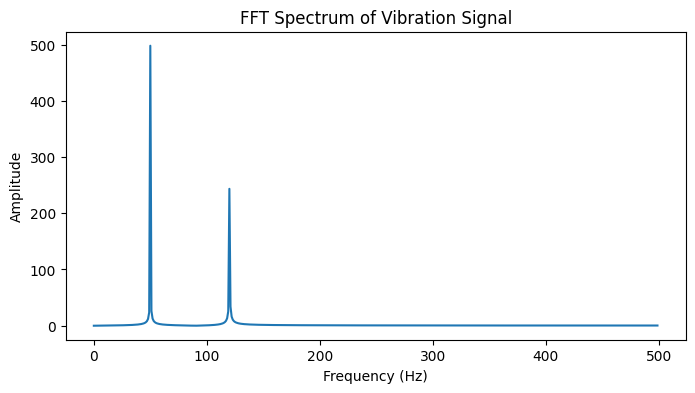

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

# Simulated Vibration Signal (Time Domain)
fs = 1000  # Sampling frequency (Hz)
t = np.linspace(0, 1, fs)  # 1 second of data
signal = np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 120 * t)  # 50Hz and 120Hz faults

# Compute FFT
N = len(signal)
fft_values = fft(signal)
frequencies = np.fft.fftfreq(N, 1/fs)

# Plot Frequency Spectrum
plt.figure(figsize=(8,4))
plt.plot(frequencies[:N//2], np.abs(fft_values[:N//2]))  # Plot only positive frequencies
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("FFT Spectrum of Vibration Signal")
plt.show()
